1.First of all we will do the analysis of the data and try to find more about it.

2.Model training - create model(s) to learn to predict a target variable based on other variables.

3.Model evaluation - evaluating a models predictions using problem-specific evaluation metrics.

4.Model comparison - comparing several different models to find the best one.

5.Hyperparameter tuning - finding better values for hyperparameters that can improve performance.

6.save the model and go for the result of prediction

## What is stock Market?
---------

As the Stock market is where investors connect to buy and sell investments — most commonly, stocks, which are shares of ownership in a public company.
You might see a news headline that says the stock market has moved lower, or that the stock market closed up or down for the day. Most often, this means stock market indexes have moved up or down, meaning the stocks within the index have either gained or lost value as a whole. Investors who buy and sell stocks hope to turn a profit through this movement in stock prices, From our this project we will try to predict the efficiency of our stock market prediction model with the help of machine learning algorithms()

In [2]:
#Let's first import out libraries to analyse the model and check out some of the imformation:- 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

stock_market=pd.read_csv("Dataset/1729258-1613615-Stock_Price_data_set_(1).csv")
stock_market.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


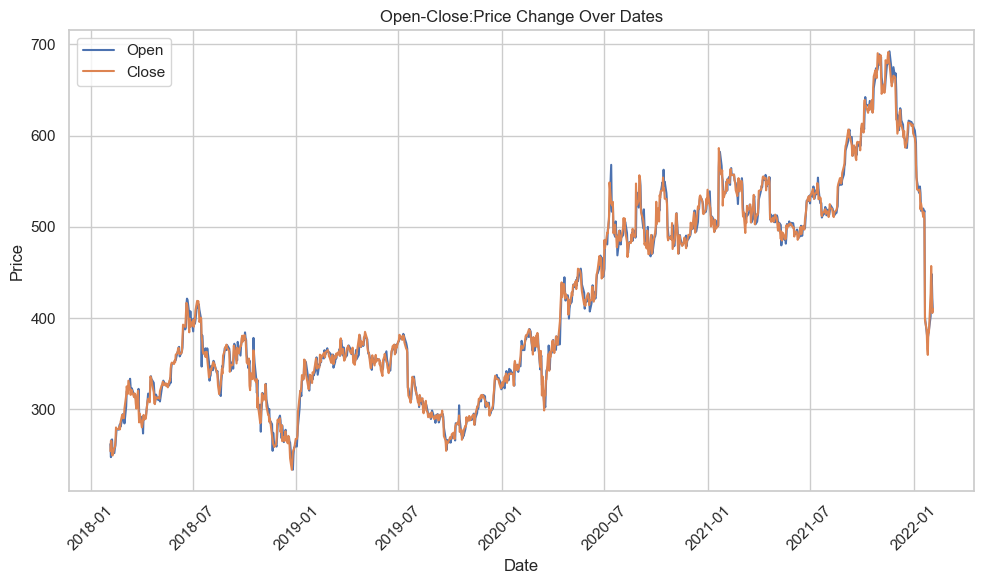

,Date,Close,Open,Relative change
0,2018-02-05,254.259995,262.000000,-0.029542
1,2018-02-06,265.720001,247.699997,0.072749
2,2018-02-07,264.559998,266.579987,-0.007577
3,2018-02-08,250.100006,267.079987,-0.063576
4,2018-02-09,249.470001,253.850006,-0.017254
5,2018-02-12,257.950012,252.139999,0.023043
6,2018-02-13,258.269989,257.290009,0.003809
7,2018-02-14,266.000000,260.470001,0.021231
8,2018-02-15,280.269989,270.029999,0.037922
9,2018-02-16,278.519989,278.730011,-0.000753


In [5]:
sns.set_theme(style="whitegrid")
open_close_price_relation=pd.DataFrame(stock_market)
open_close_price_relation["Date"]=pd.to_datetime(open_close_price_relation["Date"])
open_close_price_relation=open_close_price_relation.sort_values("Date")
open_close_price_relation["Relative change"]=(open_close_price_relation["Close"]-open_close_price_relation["Open"])/open_close_price_relation["Open"]
plt.figure(figsize=(10,6))
plt.plot(open_close_price_relation["Date"],open_close_price_relation["Open"],marker="",label="Open",linestyle="-")
plt.plot(open_close_price_relation['Date'], open_close_price_relation['Close'], marker='', label='Close', linestyle='-')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Open-Close:Price Change Over Dates')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
open_close_price_relation[["Date","Close",'Open','Relative change']].head(10)

this contains the releative change in between the close and opening price of the stock market, with their respective dates 

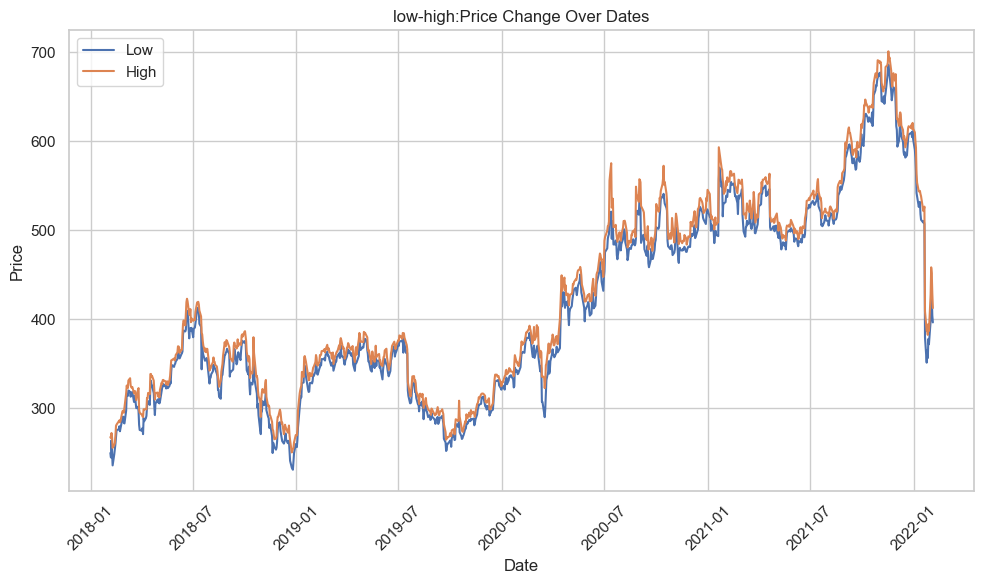

,Date,High,Low
0,2018-02-05,267.899994,250.029999
1,2018-02-06,266.700012,245.000000
2,2018-02-07,272.450012,264.329987
3,2018-02-08,267.619995,250.000000
4,2018-02-09,255.800003,236.110001
5,2018-02-12,259.149994,249.000000
6,2018-02-13,261.410004,254.699997
7,2018-02-14,269.880005,260.329987
8,2018-02-15,280.500000,267.630005
9,2018-02-16,281.959991,275.690002


In [7]:
sns.set_theme(style="whitegrid")
low_high_price_relation=pd.DataFrame(stock_market)
low_high_price_relation["Date"]=pd.to_datetime(low_high_price_relation["Date"])
low_high_price_relation=low_high_price_relation.sort_values("Date")
plt.figure(figsize=(10,6))
plt.plot(low_high_price_relation["Date"],low_high_price_relation["Low"],marker="",label="Low",linestyle="-")
plt.plot(low_high_price_relation['Date'], low_high_price_relation['High'], marker='', label='High', linestyle='-')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('low-high:Price Change Over Dates')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
low_high_price_relation[['Date','High','Low']].head(10)

Here you can see the variation in the market price of products regularly

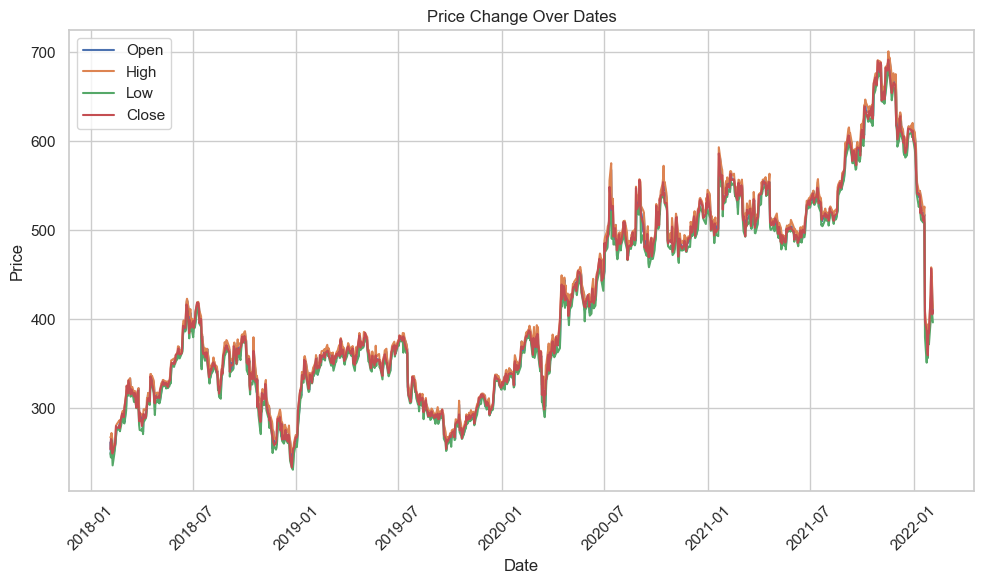

,Date,Open,High,Low,Close,Adj Close,Volume,Relative change
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,-0.029542
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,0.072749
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,-0.007577
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,-0.063576
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,-0.017254
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900,0.023043
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200,0.003809
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000,0.021231
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700,0.037922
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400,-0.000753


In [ ]:
sns.set_theme(style="whitegrid")
df=pd.DataFrame(stock_market)
df["Date"]=pd.to_datetime(df["Date"])
df=df.sort_values("Date")
df["Relative change"]=(df["Close"]-df["Open"])/df["Open"]
plt.figure(figsize=(10,6))
plt.plot(df["Date"],df["Open"],marker="",label="Open",linestyle="-")
plt.plot(df['Date'], df['High'], marker='', label='High', linestyle='-')
plt.plot(df['Date'], df['Low'], marker='', label='Low', linestyle='-')
plt.plot(df['Date'], df['Close'], marker='', label='Close', linestyle='-')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price Change Over Dates')
plt.legend()
plt.grid(True)

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
df.head(10)

In [ ]:
max_High_row = stock_market[stock_market["High"] == stock_market["High"].max()]

# Find the date and value of the lowest "Low" price
min_High_row = stock_market[stock_market["High"] == stock_market["High"].min()]
result_df = pd.concat([max_High_row, min_High_row])
result_df = result_df.reset_index(drop=True)
result_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-17,690.0,700.989990,686.090027,691.690002,691.690002,2732800
1,2018-12-24,242.0,250.649994,233.679993,233.880005,233.880005,9547600


here you can clearly see that we got the dates on which the stock price are highest and lowest and the respective volume of stock bought and sold on that day

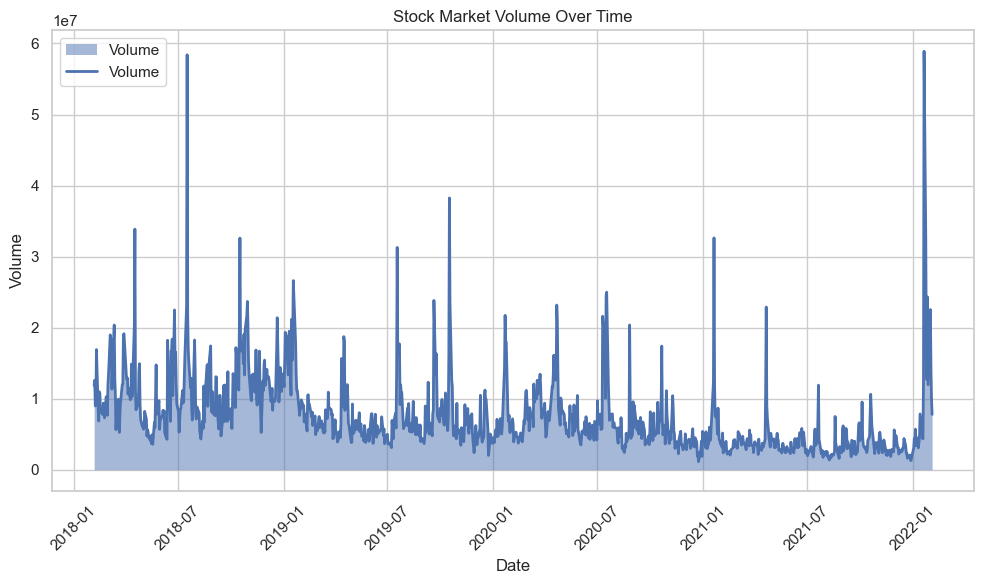

In [ ]:
# Plotting the volume of stock with the dates:- 
fig, ax = plt.subplots(figsize=(10, 6))
stock_variation=stock_market
# Convert the "Date" column to datetime and sort the DataFrame
stock_variation["Date"] = pd.to_datetime(stock_variation["Date"])
stock_variation = stock_variation.sort_values("Date")

# Fill the area under the curve with a transparent color
ax.fill_between(stock_variation["Date"], stock_variation["Volume"], alpha=0.5, linewidth=0, label="Volume")

# Plot the volume data
ax.plot(stock_variation["Date"], stock_variation["Volume"], linewidth=2, label="Volume")
ax.set_xlabel("Date")       #Add label and title to the graph
ax.set_ylabel("Volume")
ax.set_title("Stock Market Volume Over Time")
                  
ax.legend()   # Crea the legend()
ax.grid(True)  #Add grid Lines.
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  
plt.show()

The is the visualization for the volume of stock with the Date 

In [ ]:
max_volume=stock_market[stock_market["Volume"]==stock_market["Volume"].max()]
max_volume

,Date,Open,High,Low,Close,Adj Close,Volume
998,2022-01-21,400.429993,409.149994,379.98999,397.5,397.5,58904300


The Maximun volume is 58904300 and the market price hike between Price:- $379.99- $409.15 on  2022-01-21

In [ ]:
min_volume=stock_market[stock_market["Volume"]==stock_market["Volume"].min()]
min_volume

,Date,Open,High,Low,Close,Adj Close,Volume
728,2020-12-24,515.119995,519.349976,512.210022,513.969971,513.969971,1144000


The minimun stock volume is - 1144000 and the stock price hike between Price:- $512.21 - $519.21 on 2020-12-24

In [ ]:
from datetime import datetime
stock_market['Date'] = (pd.to_datetime(stock_market['Date']).apply(lambda x: int(x.timestamp())))
stock_market.head()

#Here we converted our date format into unix timestamp format so that there is no data loss and it converts all our dates into seconds after
# 1 January 1970.

,Date,Open,High,Low,Close,Adj Close,Volume
0,1517788800,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,1517875200,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,1517961600,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,1518048000,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,1518134400,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


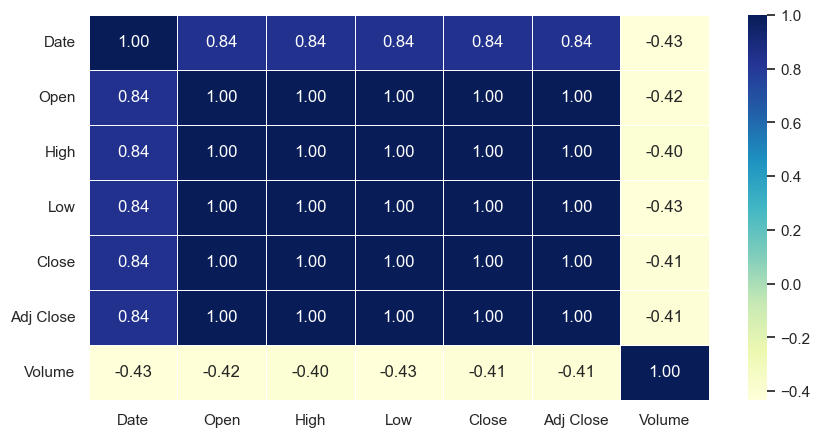

In [ ]:
corr_matrix=stock_market.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix,annot=True,
            linewidth=0.5,
            fmt='.2f',
            cmap='YlGnBu');

This is the correlation matrix the explains the relation b/w the perticular column dataset

<Axes: xlabel='Date', ylabel='Adj Close'>

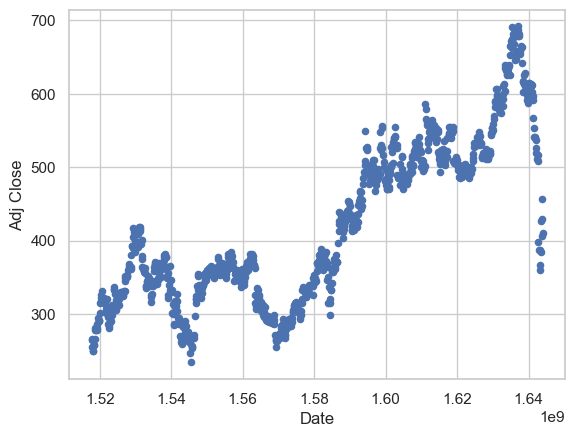

In [ ]:
stock_market.plot(kind='scatter',x='Date',y='Adj Close')

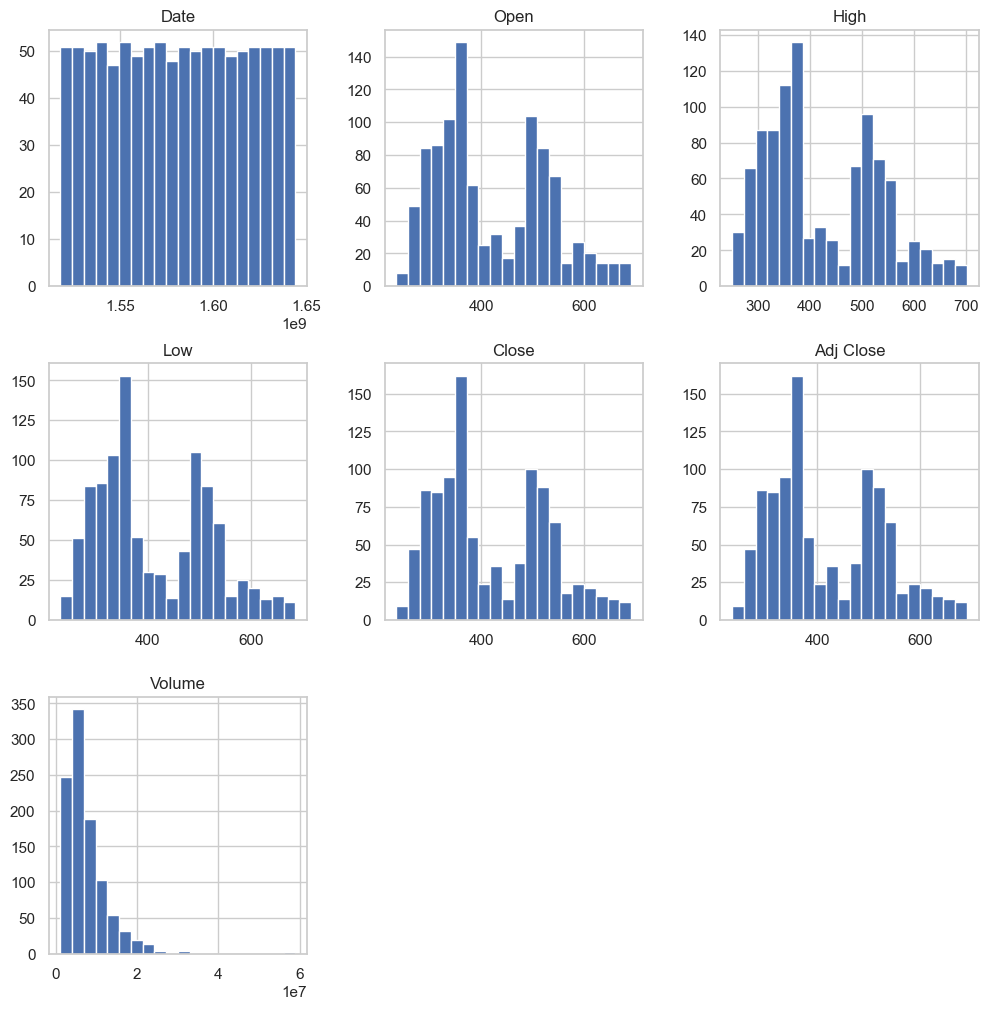

In [ ]:
stock_market.hist(bins=20, figsize=(12, 12))
plt.show()

In [ ]:
stock_market.notna().head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
5,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True
7,True,True,True,True,True,True,True
8,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True


Checking if there contains any type of missing data

## Training the model 
-----------

In [ ]:
X=stock_market.drop("Adj Close",axis=1)
y=stock_market['Adj Close']
X.head()

,Date,Open,High,Low,Close,Volume
0,1517788800,262.000000,267.899994,250.029999,254.259995,11896100
1,1517875200,247.699997,266.700012,245.000000,265.720001,12595800
2,1517961600,266.579987,272.450012,264.329987,264.559998,8981500
3,1518048000,267.079987,267.619995,250.000000,250.100006,9306700
4,1518134400,253.850006,255.800003,236.110001,249.470001,16906900


In [ ]:
y
print(y.values)

[254.259995 265.720001 264.559998 ... 429.480011 405.600006 410.170013]


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

#Model evaluators 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error
# random seed for reproductivity of data
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Here:- 
     X is independent variable

     y is Dependent variable
     
     test_size is percentage. 
     
a thumb rule is to use 80% of your data to train and other 20% of your data to test

In [ ]:
X_train.head()

,Date,Open,High,Low,Close,Volume
29,1521417600,315.799988,317.000000,307.339996,313.480011,9925200
280,1552953600,366.399994,366.959991,356.799988,358.779999,7541400
507,1581379200,373.750000,378.109985,369.720001,373.690002,4772900
706,1606089600,490.459991,491.149994,475.839996,476.619995,5416600
877,1627603200,512.690002,519.789978,510.959991,517.570007,2534900


In [ ]:
y_train,len(y_train)

(29     313.480011
 280    358.779999
 507    373.690002
 706    476.619995
 877    517.570007
           ...    
 106    418.970001
 270    354.299988
 860    535.960022
 435    281.859985
 102    398.179993
 Name: Adj Close, Length: 807, dtype: float64,
 807)

Great,we have 800 data

In [ ]:
X_test.head()

,Date,Open,High,Low,Close,Volume
628,1596499200,498.649994,510.440002,498.649994,509.640015,5608000
631,1596758400,505.450012,508.290009,486.679993,494.730011,5910300
741,1610582400,507.350006,514.500000,499.579987,500.859985,4177400
514,1582243200,385.329987,387.320007,377.899994,380.070007,3930100
365,1563494400,323.399994,325.850006,314.230011,315.100006,16302500


In [ ]:
y_test,len(y_test)

(628    509.640015
 631    494.730011
 741    500.859985
 514    380.070007
 365    315.100006
           ...    
 780    518.020020
 334    355.730011
 210    275.329987
 350    370.019989
 78     349.730011
 Name: Adj Close, Length: 202, dtype: float64,
 202)

In [ ]:
#put models in a dictionary
models={
        'Linear Regression':LinearRegression(),
        'Random Forest':RandomForestRegressor(),
        "Lasso Regression":Lasso()}
#create function to fit and score models
def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    #make lists to keep models
    model_scores={}
    # loop through models
    for name,model in models.items():
        #fit the model in the data
        model.fit(X_train,y_train)
        #evaluate the model and append its score to the model_score
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

model_scores=fit_and_score(models=models,
                           X_train=X_train,
                           X_test=X_test,
                           y_train=y_train,
                           y_test=y_test)  
model_scores

c:\Users\Dell\miniconda3\envs\snowflakes\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.634e+03, tolerance: 9.463e+02
  model = cd_fast.enet_coordinate_descent(


{'Linear Regression': 1.0,
 'Random Forest': 0.9999237461640889,
 'Lasso Regression': 0.9998868035890471}

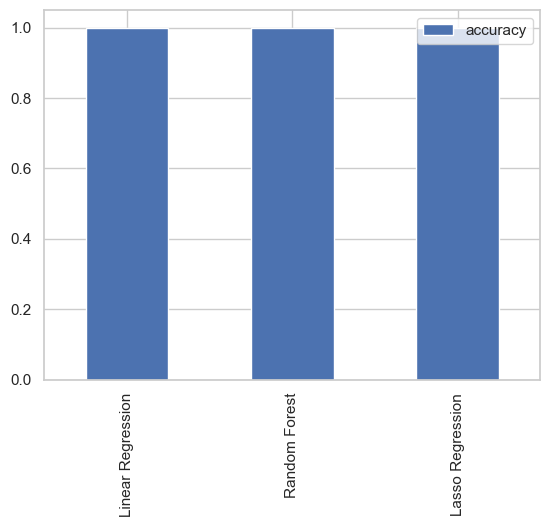

In [ ]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot.bar();

As you can see in the following models our Random Forest model fits best

-----------Score----------
===========================
Linear Regression- 100.00% ,
Random Forest - 99.99% ,
Lasso Regression - 99.98%


Now, lets predict our model score and check it's efficiency, like how much the model fits to the predicted values 

## Predict the model score
--------------------

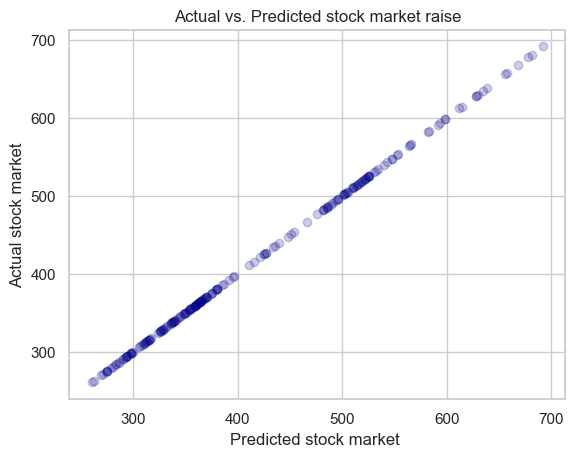

In [ ]:
y_preds=models["Linear Regression"].predict(X_test)
plt.scatter(y_test,y_preds,alpha =0.2,color="DarkBlue")
plt.title('Actual vs. Predicted stock market raise')
plt.xlabel('Predicted stock market ')
plt.ylabel('Actual stock market'); 


In [ ]:
test_df = pd.DataFrame({
    "Predicted Market Volume" : models["Linear Regression"].predict(X_test),
    "Actual Market Volume" : y_test,
}).reset_index(drop = True)

test_df

,Predicted Market Volume,Actual Market Volume
0,509.640015,509.640015
1,494.730011,494.730011
2,500.859985,500.859985
3,380.070007,380.070007
4,315.100006,315.100006
...,...,...
197,518.020020,518.020020
198,355.730011,355.730011
199,275.329987,275.329987
200,370.019989,370.019989


In [ ]:
print("MAE:" , mean_absolute_error(y_test,y_preds))
print("MSE:" , mean_squared_error(y_test,y_preds))
print("RMSE:" , np.sqrt(mean_squared_error(y_test,y_preds)))


MAE: 1.9923336907649542e-13
MSE: 7.322928612832149e-26
RMSE: 2.7060910207958914e-13


## so when we compare out model with the mean errors our mean absolute error is 1.99 e^-13 which is very less means our model is predicting the data with great accuracy 100%